#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score


import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


#### Import Data

In [2]:
train = pd.read_csv('dataset/titanic/train.csv')
test = pd.read_csv('dataset/titanic/test.csv')

In [6]:
train.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
idtest = test['PassengerId']

#### Outlier Detection :  https://www.youtube.com/watch?v=9aDHbRb4Bf8&t=10s

In [12]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over dataframe
    for col in features:

        # Find 1st Quartile
        Q1 = np.percentile(df[col],25)

        # Find 3rd Quartile
        Q3 = np.percentile(df[col],75)

        # Find InterQuartile Range
        IQR = Q3 - Q1

        # Setting outlier step to 1.5
        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # appending indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    
    # outlier_indices {'112':4,'544':5,'1123':1}
    
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)
    
    # n = 2
    # multiple_outliers = {'112':4,'544':5}

    return multiple_outliers

outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

In [9]:
ctr = 'x y z x x x y y z z z z'.split()
Counter(ctr)

Counter({'x': 4, 'y': 3, 'z': 5})

In [10]:
string = "Hello welcome to advanced machine learning batch i hope you are enjoying the class"

Counter(string)

Counter({'H': 1,
         'e': 10,
         'l': 5,
         'o': 6,
         ' ': 13,
         'w': 1,
         'c': 5,
         'm': 2,
         't': 3,
         'a': 7,
         'd': 2,
         'v': 1,
         'n': 6,
         'h': 4,
         'i': 4,
         'r': 2,
         'g': 2,
         'b': 1,
         'p': 1,
         'y': 2,
         'u': 1,
         'j': 1,
         's': 2})

In [13]:
outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [14]:
train.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [15]:
train = train.drop(outliers_to_drop,axis=0).reset_index(drop=True)
train.shape

(881, 12)

#### Feature Engineering

In [16]:
train_len = len(train)
df = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1298 non-null   float64
 10  Cabin        292 non-null    object 
 11  Embarked     1297 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


##### Checking for missing values

In [19]:
df.fillna(np.nan,inplace=True)
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

##### Feature Analysis

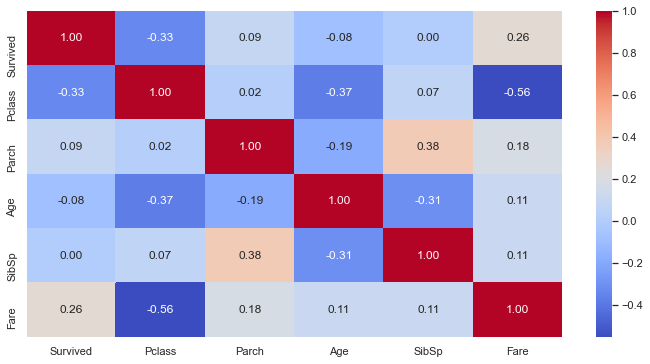

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(train[['Survived', 'Pclass', 'Parch','Age', 'SibSp','Fare']].corr(),
           annot=True,
           cmap='coolwarm',
           fmt='.2f');

1. Fare is having correlation w Pclass and Survived


2. Pclass is having correlation with Fare and Survived and Age


3. SibSp and parch are correlated

#### Explore SibSp

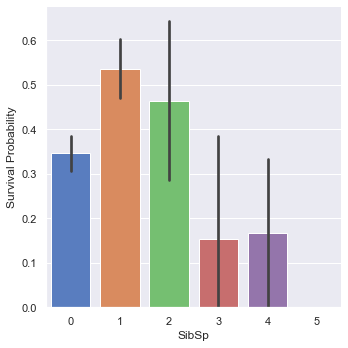

In [25]:
g = sns.factorplot(x='SibSp',y='Survived',data=train,kind='bar',palette='muted')

g = g.set_ylabels('Survival Probability')

1. More SibSp less survival


2. Single passengers and SibSp = 1,2 are having more surv. rate than SibSp>2

#### Parch

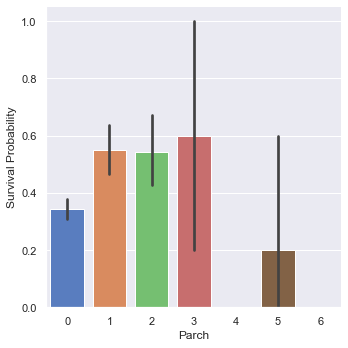

In [26]:
g = sns.factorplot(x='Parch',y='Survived',data=train,kind='bar',palette='muted')

g = g.set_ylabels('Survival Probability')

1. Smaller families have higher chance of survival



* Single - 0


* Small - 1,2


* Medium - 3,4


* Large - 5,6

#### Age

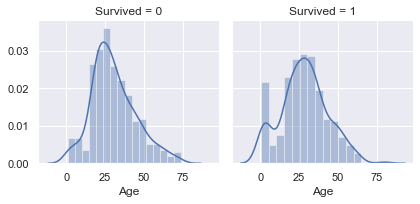

In [27]:
g = sns.FacetGrid(train,col='Survived')

g = g.map(sns.distplot,'Age')

1. Age distribution is gaussian in nature.


2. Peaks indicate that the younger population survived more.

#### Fare

In [28]:
df['Fare'].isnull().sum()

1

In [29]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [30]:
df['Fare'].isnull().sum()

0

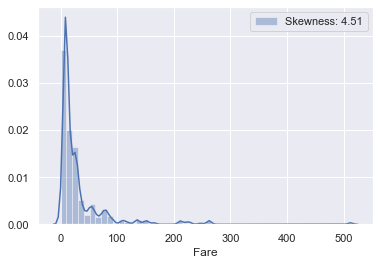

In [31]:
g = sns.distplot(df['Fare'],label='Skewness: %.2f'%(df['Fare'].skew()))
g = g.legend()

**Log transformation to remove the skew**

In [32]:
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x>0 else 0)

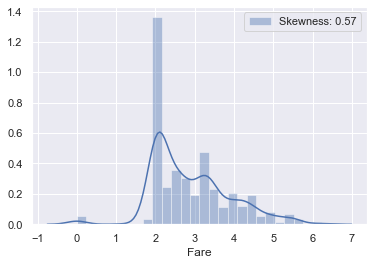

In [33]:
g = sns.distplot(df['Fare'],label='Skewness: %.2f'%(df['Fare'].skew()))
g = g.legend()

### Categorical Columns

##### Sex

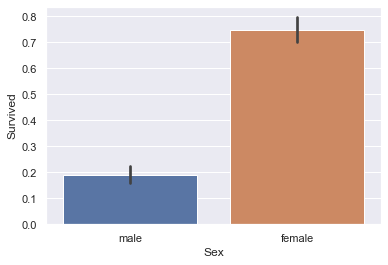

In [34]:
g = sns.barplot(x='Sex',y='Survived',data=train)

In [35]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


#### PClass

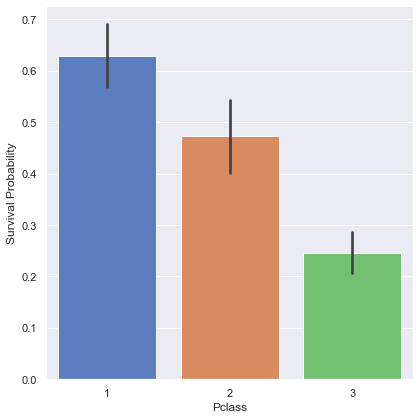

In [36]:
g = sns.factorplot(x='Pclass',y='Survived',data=train,kind='bar',palette='muted',size=6)
g = g.set_ylabels('Survival Probability')

Survival Prob (Pclass = 1) > Survival Prob (Pclass = 2) > Survival Prob (Pclass = 3)

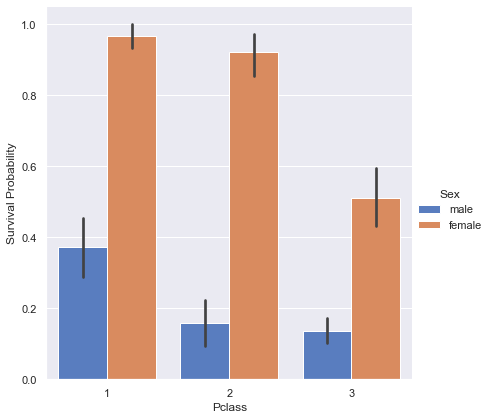

In [38]:
g = sns.factorplot(x='Pclass',y='Survived',data=train,kind='bar', hue = 'Sex',palette='muted',size=6)
g = g.set_ylabels('Survival Probability')

Trend by Sex ratio remains same

##### Embarked

In [39]:
df['Embarked'].isnull().sum()

2

In [40]:
df['Embarked'].value_counts()

S    904
C    270
Q    123
Name: Embarked, dtype: int64

* S - Southampton

* C - Cherbourg

* Q - Queenstown

In [41]:
df['Embarked'].fillna('S',inplace=True)

In [42]:
df['Embarked'].isnull().sum()

0

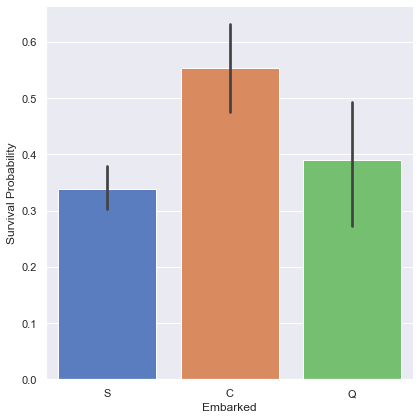

In [44]:
g = sns.factorplot(x = 'Embarked',
                   y = 'Survived',
                   data = train,
                   kind = 'bar',
                   size = 6,
                   palette = 'muted')

g = g.set_ylabels('Survival Probability')

1. Highest prob. of survival is of people who embarked from Cherbourg.

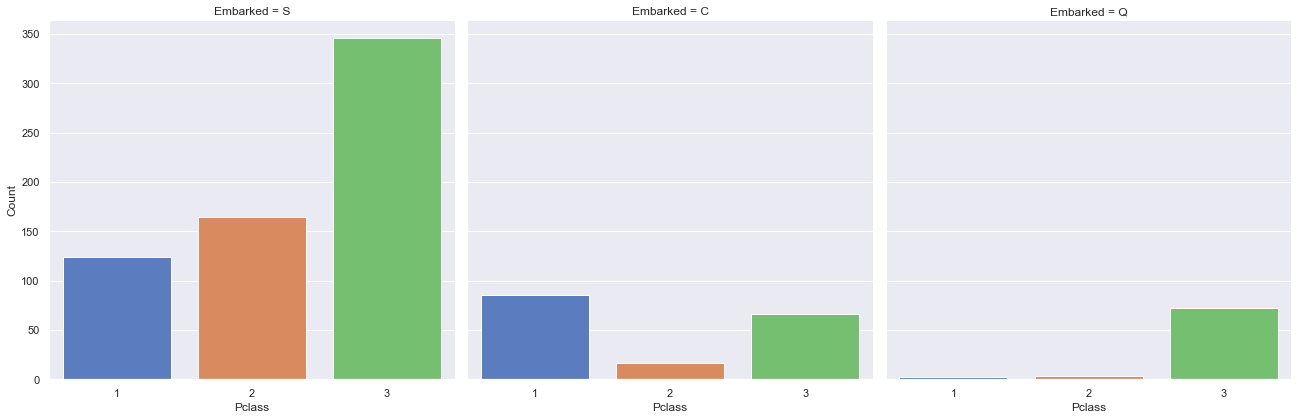

In [47]:
g = sns.factorplot(x = 'Pclass',
                   col = 'Embarked',
                   data = train,
                   kind = 'count',
                   size = 6,
                   palette = 'muted')

g = g.set_ylabels('Count')

#### Missing value imputations

In [48]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

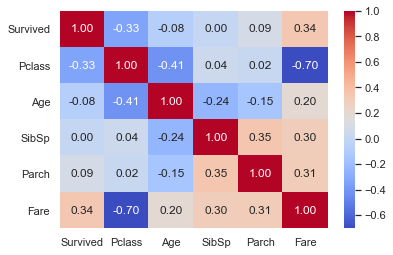

In [50]:
sns.heatmap(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm'
           )

##### Imputing Age

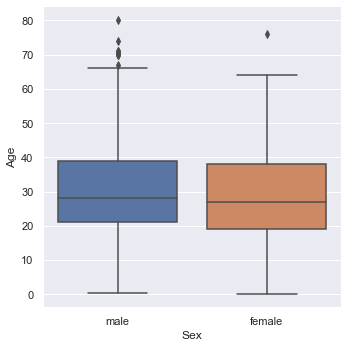

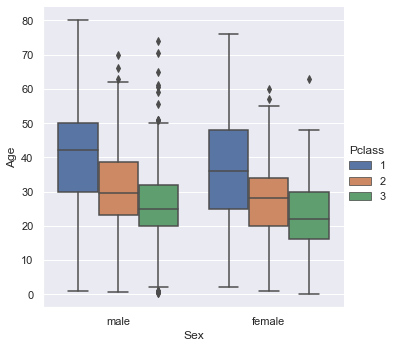

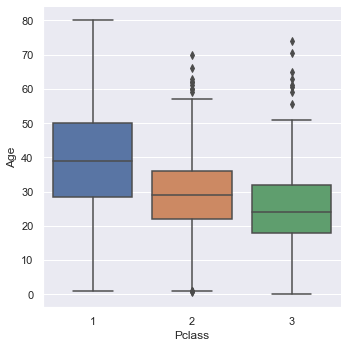

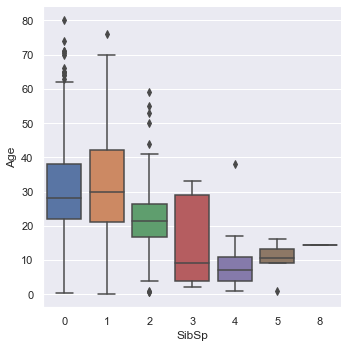

In [51]:
g = sns.factorplot(x='Sex',y='Age',data=df,kind='box')
g = sns.factorplot(x='Sex',y='Age',hue='Pclass',data=df,kind='box')
g = sns.factorplot(x='Pclass',y='Age',data=df,kind='box')
g = sns.factorplot(x='SibSp',y='Age',data=df,kind='box')

#### We'll use SibSp, parch, and pclass for imputing age - Age column imputation strategy

In [52]:
index_nan = list(df['Age'][df['Age'].isnull()].index)

age_median = df['Age'].median()

for i in index_nan:
    
    age_pred = df['Age'][(df['SibSp'] == df.iloc[i]['SibSp'])
                         & (df['Parch'] == df.iloc[i]['Parch'])
                         & (df['Pclass'] == df.iloc[i]['Pclass'])].median()
    
    if not np.isnan(age_pred):
        df['Age'].iloc[i] = age_pred
    else:
        df['Age'].iloc[i] = age_median

In [53]:
df['Age'].isnull().sum()

0

# HW - Substitute value of i as 5,17,19, ... index_nan from above before imputing age

    age_pred = df['Age'][(df['SibSp'] == df.iloc[i]['SibSp'])
                         & (df['Parch'] == df.iloc[i]['Parch'])
                         & (df['Pclass'] == df.iloc[i]['Pclass'])].median()

In [54]:
index_nan

[5,
 17,
 19,
 26,
 27,
 28,
 30,
 31,
 35,
 41,
 44,
 45,
 46,
 47,
 54,
 63,
 64,
 75,
 76,
 81,
 86,
 93,
 99,
 105,
 107,
 119,
 124,
 126,
 138,
 152,
 156,
 163,
 165,
 173,
 177,
 181,
 182,
 192,
 194,
 209,
 218,
 224,
 230,
 235,
 236,
 245,
 251,
 255,
 259,
 265,
 269,
 272,
 279,
 290,
 293,
 295,
 296,
 298,
 299,
 301,
 324,
 328,
 329,
 340,
 344,
 347,
 351,
 352,
 357,
 360,
 361,
 368,
 377,
 381,
 402,
 403,
 404,
 406,
 408,
 413,
 418,
 421,
 424,
 437,
 444,
 447,
 450,
 452,
 457,
 459,
 461,
 463,
 468,
 474,
 478,
 483,
 488,
 490,
 495,
 500,
 504,
 510,
 515,
 517,
 520,
 524,
 526,
 531,
 540,
 545,
 550,
 553,
 556,
 557,
 561,
 566,
 571,
 577,
 582,
 586,
 589,
 591,
 594,
 595,
 604,
 605,
 606,
 622,
 626,
 632,
 636,
 641,
 643,
 646,
 649,
 660,
 662,
 667,
 673,
 685,
 690,
 702,
 704,
 711,
 720,
 725,
 731,
 732,
 733,
 753,
 759,
 761,
 766,
 769,
 771,
 776,
 783,
 785,
 807,
 817,
 818,
 820,
 824,
 829,
 831,
 840,
 850,
 858,
 868,
 878,
 891